# DecouplR Transcription Factor Analysis

In [2]:
import numpy as np
import pandas as pd
import anndata as ad

import anndata
import scanpy as sc
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics
import seaborn as sns

from scipy import io
import scipy
import sys
import warnings

import decoupler as dc
 

import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

Load in the data and make sure the raw counts are set as the data. Also remove glia from the analysis because we are most interested in the neuronal biology.

In [4]:
#load in the data 
file_name = "Data_Files/Filtered_NoContam_annotated_data_10082024.h5ad"
data = anndata.read_h5ad(file_name)

#set the raw property as the counts
data.raw = data
data

data = data[data.obs["sctype_classification"] != 'Glia']

In [8]:
data = anndata.read_h5ad(file_name)
data.var

,ERCC,mt,ribosomal,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Gm15178,False,False,False,3,0.000977,0.000976,99.902344,3.0,1.386294
Gm29155,False,False,False,8,0.003906,0.003899,99.739583,12.0,2.564949
C730036E19Rik,False,False,False,4,0.001953,0.001951,99.869792,6.0,1.945910
Gm29157,False,False,False,1,0.000326,0.000325,99.967448,1.0,0.693147
Gm29156,False,False,False,1,0.000326,0.000325,99.967448,1.0,0.693147
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000079808.4,False,False,False,72,0.028646,0.028243,97.656250,88.0,4.488636
ENSMUSG00000095041.8,False,False,False,2303,5.208333,1.825892,25.032552,16000.0,9.680407
ENSMUSG00000095742.2,False,False,False,2,0.000651,0.000651,99.934896,2.0,1.098612
S1gfp,False,False,False,53,0.023438,0.023167,98.274740,72.0,4.290460


In [ ]:
data.var[data.var.index == "Ffar4"]

# #== 'Sucnr1'

# if 'Sucnr1' in list:
#     print("String found!")

# Transcripton factor activity inference

Infers TF activity in different cell types

Uses the collecTRI network for the gene interaction data base

In [5]:
net = dc.get_collectri(organism='mouse', split_complexes=False)
net

,source,target,weight,PMID
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...
1,Spi1,Bglap,1,10022617
2,Spi1,Bglap3,1,10022617
3,Spi1,Bglap2,1,10022617
4,Smad3,Jun,1,10022869;12374795
...,...,...,...,...
38660,Runx1,Lcp2,1,20019798
38661,Runx1,Prr5l,1,20019798
38662,Twist1,Gli1,1,11948912
38663,Usf1,Nup188,1,22951020


## Fitting the univariate model

A univariate linear model is fit to predict the observed gene expression based on the TFs present.

Output is the t-value of the slope as the score. If a TF is active, the score is positive. If it is inactive, the score is negavtive.

In [7]:
dc.run_ulm(
    mat=data,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)
#store in a named slot
#store the estimates in a new slot to keep things named
data.obsm['TF_ulm_estimate'] = data.obsm['ulm_estimate'].copy()
data.obsm['TF_ulm_pvals'] = data.obsm['ulm_pvals'].copy()
data

5451 features of mat are empty, they will be removed.
Running ulm on mat with 1477 samples and 28037 targets for 694 sources.


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\cpuki\anaconda3\Lib\site-packages\decoupler\pre.py:286: ImplicitModificationWarning: Setting element `.obsm['ulm_estimate']` of view, initializing view as actual.
  mat.obsm[result.name] = result


AnnData object with n_obs × n_vars = 1477 × 33488
    obs: 'cell_counts', 'n_genes', 'percent_mito', 'Unnamed: 0', 'Plate ID', 'Row', 'Column', 'Genotype', 'Mouse', 'Region', 'Experiment Date', 'DOB', 'Cage', 'wellID', 'Row-Column', 'Number', 'FSC Height', 'FSC Area', 'FSC Width', 'SSC Height', 'SSC Area', 'SSC Width', '525/50 GFP Height', '525/50 GFP Area', '525/50 GFP Width', '665/30 Dye Cycle Ruby Height', '665/30 Dye Cycle Ruby Area', '665/30 Dye Cycle Ruby Width', 'Time', 'Well Index', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_ERCC', 'log1p_total_counts_ERCC', 'pct_counts_ERCC', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribosomal', 'log1p_total_counts_ribosomal', 'pct_counts_ribosomal', 'Filtered_Status', 'Seurat_Clusters', 'sctype_classification', 'sctype_classification

Displaying the results of the analysis for each cell

Lets visualize and investigate the top TFs per cell type

rank_sources_groups uses the scanpy rank gene groups to calculate the TFs

In [10]:
#extract the obtained scores
acts = dc.get_acts(data, obsm_key='TF_ulm_estimate')
acts

#get the top TF per cell type
df = dc.rank_sources_groups(acts, groupby='sctype_classification_num', reference='rest', method='t-test_overestim_var')
#filter df by only significant TF groups
df = df[df["pvals_adj"]<0.05]

df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,PEMN1,rest,Irx4,14.389087,4.044839,1.435975e-35,9.965667e-33
1,PEMN1,rest,Zfpm2,13.836823,2.493143,1.384745e-33,4.805064e-31
2,PEMN1,rest,Nr4a2,13.432620,4.620226,1.311711e-30,3.034426e-28
3,PEMN1,rest,Ctnnb1,12.385575,2.091388,1.391689e-27,1.931664e-25
4,PEMN1,rest,Olig2,12.359902,1.286816,2.751073e-28,4.773112e-26
...,...,...,...,...,...,...,...
6935,PSN1,rest,Olig2,-5.335799,-0.740370,1.336835e-06,1.546273e-04
6936,PSN1,rest,Nkx2-5,-5.596948,-0.654627,2.723955e-07,3.780850e-05
6937,PSN1,rest,Zbtb7b,-5.889823,-0.605708,1.607577e-07,2.789146e-05
6938,PSN1,rest,Nfix,-6.022435,-0.893623,4.096365e-08,9.476257e-06


In [11]:
acts

AnnData object with n_obs × n_vars = 1477 × 694
    obs: 'cell_counts', 'n_genes', 'percent_mito', 'Unnamed: 0', 'Plate ID', 'Row', 'Column', 'Genotype', 'Mouse', 'Region', 'Experiment Date', 'DOB', 'Cage', 'wellID', 'Row-Column', 'Number', 'FSC Height', 'FSC Area', 'FSC Width', 'SSC Height', 'SSC Area', 'SSC Width', '525/50 GFP Height', '525/50 GFP Area', '525/50 GFP Width', '665/30 Dye Cycle Ruby Height', '665/30 Dye Cycle Ruby Area', '665/30 Dye Cycle Ruby Width', 'Time', 'Well Index', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_ERCC', 'log1p_total_counts_ERCC', 'pct_counts_ERCC', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribosomal', 'log1p_total_counts_ribosomal', 'pct_counts_ribosomal', 'Filtered_Status', 'Seurat_Clusters', 'sctype_classification', 'sctype_classification_n

## Plotting markers per cell type

Lets investigate the top 5 markers per cell type

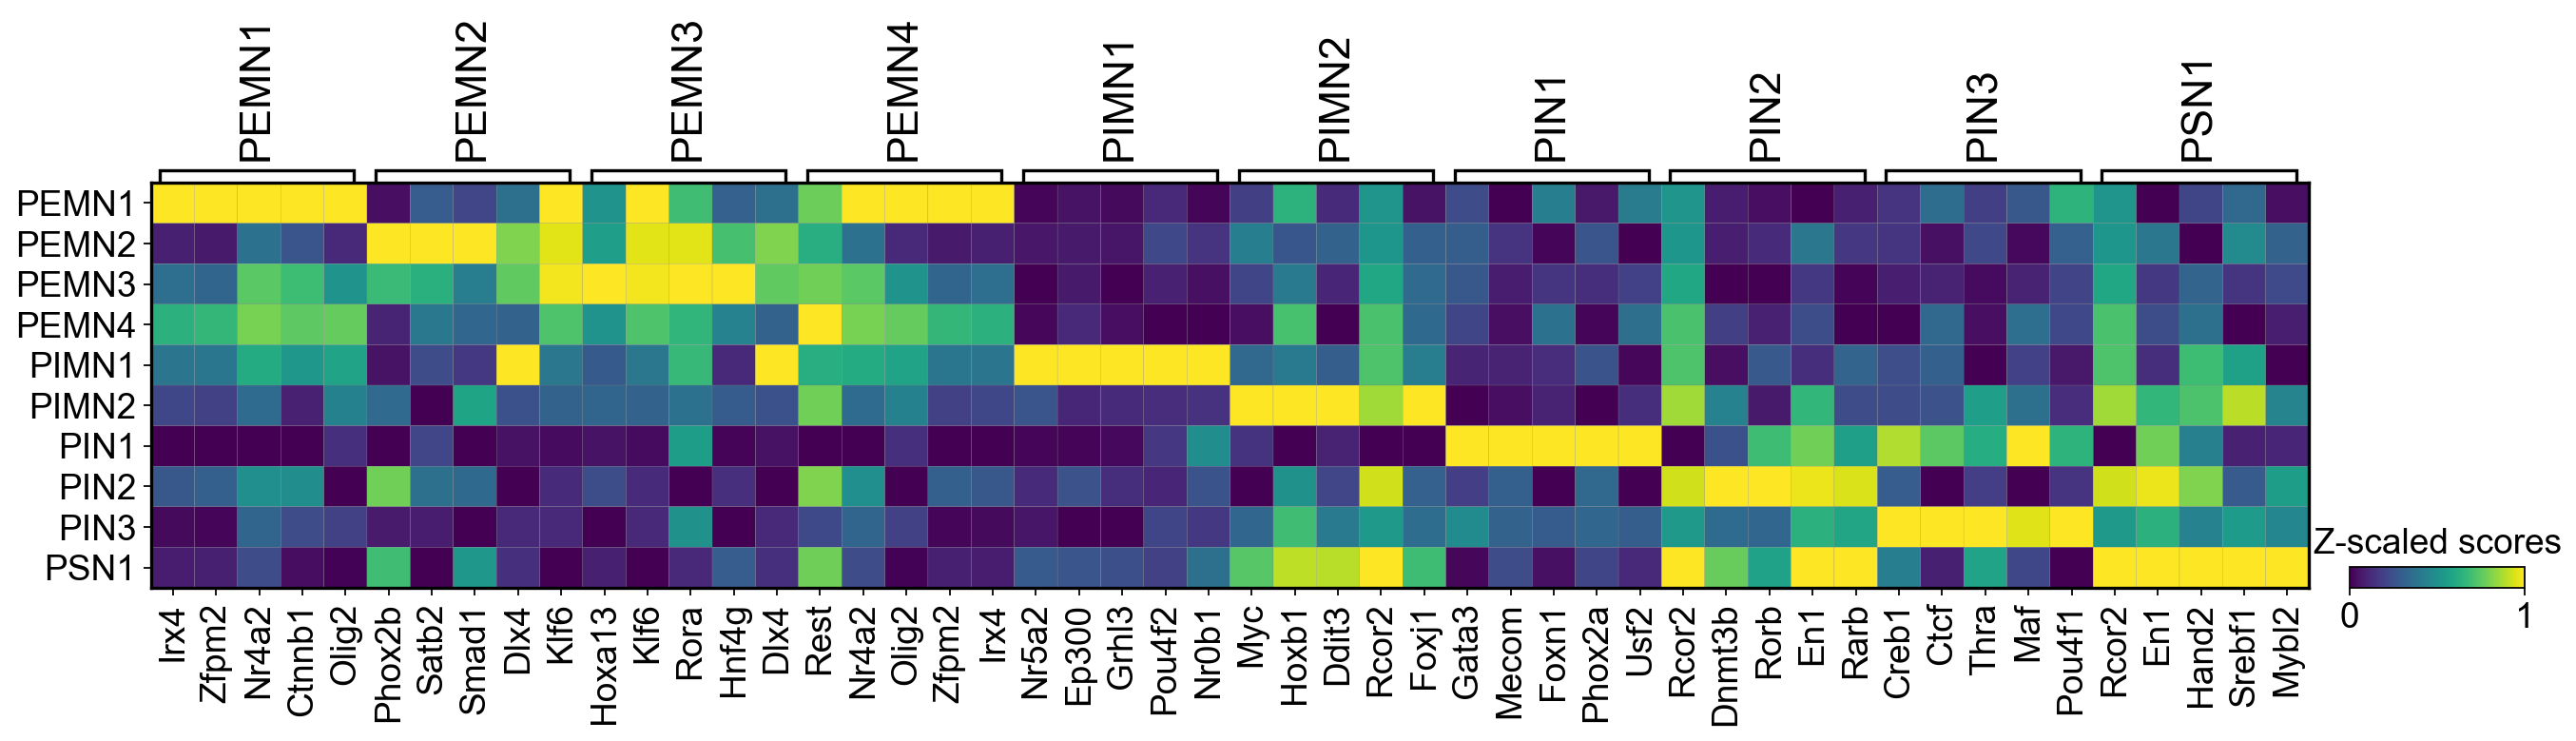

In [18]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers = dict(sorted(source_markers.items()))

#plot the markers
sc.set_figure_params(scanpy=True, fontsize=20)
sc.pl.matrixplot(acts, source_markers, 'sctype_classification_num', standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='viridis',categories_order=list(source_markers.keys()),swap_axes=False,
                 save = "Transcription factor heatmap.png"
                )

# Other plots

Investigating Transcription Factors associated with Pathway Activities

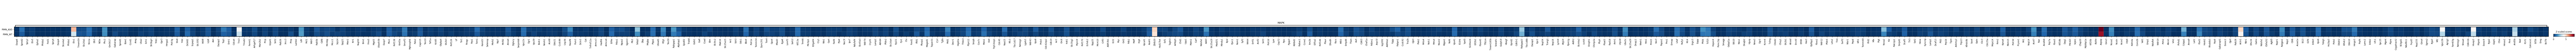

NameError: name 'ASO_cells' is not defined

In [15]:
#plotting raw TF expression values

#cell type
ct = "PIMN"
pathw = "MAPK"

#read in the pryogen table which includes a mapping between transcription factors and pathways
pryogen_net = pd.read_csv("Pryogen_Net.csv",delimiter=" ")

#list of genes
gene_list = data.var.index.to_list()

#filter the net by only the genes we have in the data
pryogen_net_filt = pryogen_net[pryogen_net['target'].isin(gene_list)]

genes = pryogen_net_filt[pryogen_net_filt["source"] == pathw]

genes_dict = genes.groupby(["source"])['target'].apply(list).to_dict()

data_cell_types = data[data.obs["sctype_classification"].isin([ct])]

#plot the TFs discovered in the desired cell type
sc.pl.matrixplot(data_cell_types, genes_dict, ['sctype_classification','Genotype'], standard_scale=None,
                 colorbar_title='Z-scaled scores', cmap='RdBu_r',swap_axes=False
                )


#run a t-test between the genotypes
#pull the data for the two cell types
data_cell_types_genes = data_cell_types[:,genes["target"]]
ASO_cells_data = data_cell_types[data_cell_types.obs["Genotype"] == "ASO"][:,genes["target"]].X.toarray()
WT_cells_data = data_cell_types[data_cell_types.obs["Genotype"] == "WT"][:,genes["target"]].X.toarray()
res = scipy.stats.ttest_ind(ASO_cells,WT_cells,axis=0, #test columns
                     equal_var = False #Welche's T-test which does not assume equal variance
                     ) #two sided test
p_vals = res[1]
data_cell_types_genes.var["p-vals"] = p_vals
data_cell_types_genes.var["p-vals_adj"] = p_vals/len(p_vals)

cutoff = 0.0001
var = data_cell_types_genes.var.sort_values("p-vals_adj")

reduced_gene_list = var[var["p-vals_adj"] < cutoff].index.to_list()

sc.pl.matrixplot(data_cell_types_genes, reduced_gene_list, ['sctype_classification','Genotype'], standard_scale=None, cmap='RdBu_r',swap_axes=True,use_raw=True
                )

In [ ]:
#run a t-test between the genotypes
Tf_ulm_estimate_data = Acts_cell_types_genes_subset.obsm["TF_ulm_estimate"][PI3k_TFs["target"]]
Tf_ulm_estimate_data = Tf_ulm_estimate_data.merge(Acts_cell_types_genes_subset.obs["Genotype"],left_index=True, right_index=True)


ASO_cells = Tf_ulm_estimate_data[Tf_ulm_estimate_data["Genotype"] == 'ASO'].drop(columns = "Genotype")
WT_cells = Tf_ulm_estimate_data[Tf_ulm_estimate_data["Genotype"] == 'ASO'].drop(columns = "Genotype")
t_res = scipy.stats.ttest_ind(ASO_cells,WT_cells,axis=0, #test columns
                     equal_var = True #Welche's T-test which does not assume equal variance
                     ) #two sided test

# t_res[t_res<0.05]

t_res

In [ ]:
WT_cells

In [ ]:
WT_cells

## Other plots avalible

In [ ]:
# # plot a violin plot for individual TFs
# sc.pl.violin(acts, keys=['EBF1'], groupby='sctype_classification', rotation=90)

# #network of relevant TFs and target genes
# tf_list = ['PAX5', 'EBF1', 'RFXAP'] #list of interesting TFs

# dc.plot_network(
#     net=net,
#     n_sources=tf_list,
#     n_targets=15,
#     node_size=100,
#     s_cmap='white',
#     t_cmap='white',
#     c_pos_w='darkgreen',
#     c_neg_w='darkred',
#     figsize=(5, 5)
# )

In [ ]:
known_ens_defect_TFs = ["Phox2b","Hoxb5","Sox10","Foxd3","Gli3","Smad1","Ascl1","Gli2","Nr2f1","Hlx",'Dlx1',"Dlx1","Hand2","Sox6","Zeb2",'Tbx3','Tlx2'] #"RbFox1"

sc.pl.matrixplot(acts, known_ens_defect_TFs, ['sctype_classification','Genotype'], standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='viridis',swap_axes=False
                )

In [ ]:
acts

In [ ]:
df_tf